In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4caed388c6a73722bfab85ab71e29d45


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create a list for cities
cities = []


In [23]:
for coordinate in coordinates:   
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
          
    if city not in cities:
        cities.append(city)

len(cities)

605

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | achikulak
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | samarai
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | srednekolymsk
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | nam tha
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | ati
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | tera
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | la libertad
Processing Record 39 of Set 4 | half moon bay
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | sarkand
Processing Record 42 of Set 4 | ous
Processing Record 43 of Set 4 | arkhipo-osipovka
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | mocuba
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | taft
Processing Record 48 of Set 4 | maldonado
Processing Record 49 of Set 4 | sao joao da barra
Processing Record 50 of Set 4 | tateyama
Processing Record 1 of Set 5 | tabarqah
City not found. Skipping...
Processing Record 2 of Set 5 | thaba-tseka
Processing Record 3 of Set 5 | mandan
Processing Record 4 of Set 5 | straumen
Processing Record 5 of Set 5 | bara
Processing Record 6 of Set 5 | gummidipundi
Processing Record 7 of Set 5 | lucea
Processing Record 8 of Set 5 | hay river
Processing Record 9 of Set 5 | mae sai
Processing Record 10 of Set 5 | bethel
Processing Record 11 of 

Processing Record 22 of Set 8 | nicoya
Processing Record 23 of Set 8 | kargil
Processing Record 24 of Set 8 | cabras
Processing Record 25 of Set 8 | elliot lake
Processing Record 26 of Set 8 | pandan
Processing Record 27 of Set 8 | shintomi
Processing Record 28 of Set 8 | krokeai
Processing Record 29 of Set 8 | langres
Processing Record 30 of Set 8 | madera
Processing Record 31 of Set 8 | vilhena
Processing Record 32 of Set 8 | angoche
Processing Record 33 of Set 8 | conceicao do araguaia
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 36 of Set 8 | tonantins
Processing Record 37 of Set 8 | uyemskiy
Processing Record 38 of Set 8 | abu samrah
Processing Record 39 of Set 8 | bukama
Processing Record 40 of Set 8 | la ronge
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | sergiyevsk
Processing Record 43 of Set 8 | papayal
Processing Record 44 of Set 8 | sakaraha
Processing Record 

Processing Record 8 of Set 12 | udachnyy
Processing Record 9 of Set 12 | comodoro rivadavia
Processing Record 10 of Set 12 | medea
Processing Record 11 of Set 12 | dongsheng
Processing Record 12 of Set 12 | vao
Processing Record 13 of Set 12 | voh
Processing Record 14 of Set 12 | uvat
Processing Record 15 of Set 12 | puerto narino
Processing Record 16 of Set 12 | butler
Processing Record 17 of Set 12 | namibe
Processing Record 18 of Set 12 | paramonga
Processing Record 19 of Set 12 | stara vyzhivka
Processing Record 20 of Set 12 | bousso
Processing Record 21 of Set 12 | vanimo
Processing Record 22 of Set 12 | mount isa
Processing Record 23 of Set 12 | vangaindrano
Processing Record 24 of Set 12 | plouzane
Processing Record 25 of Set 12 | bay roberts
Processing Record 26 of Set 12 | storslett
Processing Record 27 of Set 12 | gweru
Processing Record 28 of Set 12 | eyl
Processing Record 29 of Set 12 | souillac
Processing Record 30 of Set 12 | whitehorse
Processing Record 31 of Set 12 | ma

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,66.78,68,79,4.23,US,2021-10-21 22:36:57
1,Achikulak,44.5517,44.8378,45.72,56,1,5.41,RU,2021-10-21 22:37:14
2,Narsaq,60.9167,-46.0500,30.42,39,100,4.56,GL,2021-10-21 22:37:14
3,Upernavik,72.7868,-56.1549,19.15,90,90,5.75,GL,2021-10-21 22:37:15
4,Codrington,-38.2667,141.9667,60.22,84,47,2.01,AU,2021-10-21 22:37:15
5,Saint-Philippe,-21.3585,55.7679,71.19,79,7,9.91,RE,2021-10-21 22:37:16
6,Samarai,-10.6167,150.6667,82.53,69,35,12.24,PG,2021-10-21 22:37:16
7,Ushuaia,-54.8000,-68.3000,40.66,81,40,29.93,AR,2021-10-21 22:34:03
8,Mataura,-46.1927,168.8643,60.91,47,5,3.51,NZ,2021-10-21 22:37:17
9,Hermanus,-34.4187,19.2345,60.80,75,100,11.14,ZA,2021-10-21 22:37:17


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-21 22:36:57,42.6001,-73.9662,66.78,68,79,4.23
1,Achikulak,RU,2021-10-21 22:37:14,44.5517,44.8378,45.72,56,1,5.41
2,Narsaq,GL,2021-10-21 22:37:14,60.9167,-46.0500,30.42,39,100,4.56
3,Upernavik,GL,2021-10-21 22:37:15,72.7868,-56.1549,19.15,90,90,5.75
4,Codrington,AU,2021-10-21 22:37:15,-38.2667,141.9667,60.22,84,47,2.01
...,...,...,...,...,...,...,...,...,...
548,Leh,IN,2021-10-21 22:40:53,34.1667,77.5833,38.44,49,0,4.07
549,Merauke,ID,2021-10-21 22:40:54,-8.4667,140.3333,81.59,76,78,6.96
550,Innisfail,AU,2021-10-21 22:40:54,-17.5333,146.0333,85.87,67,49,7.14
551,Montepuez,MZ,2021-10-21 22:38:16,-13.1256,38.9997,67.87,84,41,5.82


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

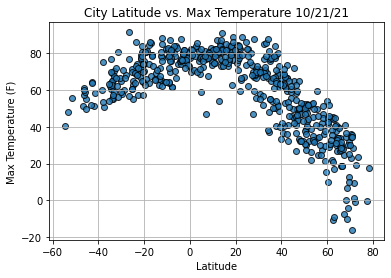

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

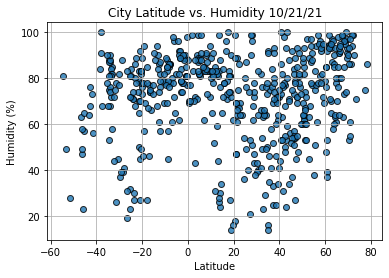

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

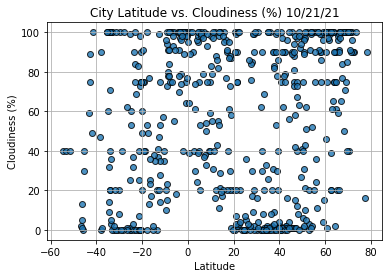

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()